# Initialisation


In [26]:
# IMPORTS
import numpy as np  # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [27]:
# Import DataSet ds and Models
from src.models import AnalysisModels as Models
from src.datasets import IMDBDataset

ds = IMDBDataset(
    config_path="./configs/datasets/imdb.yaml", root="datasets/imdb", download=True
)


models = Models(
    config_path="./configs/models/analysis-models.yaml",
    root="./models/analysis-models",
    download=True,
)

loaded_plain_model_rf = models.rf.model

Creating dataset
Initializing objects
Encoding
Dataset created


c:\Users\Thilini\anaconda3\envs\xai1\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Thilini\anaconda3\envs\xai1\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Thilini\anaconda3\envs\xai1\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.2.2 when using version 1.2.1. This might lead to breaking

## SEDC Function


In [20]:
# Get threshold_classifier_probs
p = np.sum(ds.y_train) / np.size(ds.y_train)

probs = loaded_plain_model_rf.predict(ds.x_test)
threshold_classifier_probs = np.percentile(probs, (50.33))
predictions_probs = probs >= threshold_classifier_probs

accuracy_test = accuracy_score(ds.y_test, np.array(predictions_probs))
print("The classification threshold is %f" % threshold_classifier_probs)
print(
    "The accuracy of the model on the test data is %f" % accuracy_test
)  # TODO: Put this custom threshold inside the testbench

The classification threshold is 0.493400
The accuracy of the model on the test data is 0.854971


## Analysis


### Analyzer


In [ ]:
from src.analyzers import RFAnalyzer
%load_ext autoreload
%autoreload 2


explainer_rf = RFAnalyzer(
    "./models/analysis-models/rf.pkl",
    "./models/analysis-models/tfidf.pkl",
    threshold_classifier=0.49339999999983775,
    max_iter=50,
    time_maximum=300,
)

text = "Honestly - this short film sucks. the dummy used in the necro scene is pretty well made but still phony enough looking to ruin the viewing experience. the Unearthed DVD is crisp and clear and I haven't made up my mind if this helps or hinders it. If the film was a little grainy it might have added some 'creepiness factor' to what was going on. I have no idea why this film has so much hype surrounding it other than the subject matter - but to be honest the necrophilia scenes in films like NEKROMANTIK and VISITOR Q among others, are more shocking than in AFTERMATH. All this talk about the film being about loneliness and all other manner of deep philosophy is bull****. This is an expensive, beautifully filmed turd. It's not that shocking, it's not that disgusting. if you insist on viewing it - rent it. I give it a 3 for the fact that not many people make explicit movies about necrophilia (there should definitely be a bigger selection for us sickos ;) - the filming is good and it does have some 'gore' (if watching a rubbery looking doll get cut open is considered gore...) but other than that - absolutely nothing going for this over-hyped mess. On the other hand - GENESIS - Cerda's 'sequel' to AFTERMATH (now available as a 'double feature' released by Unearthed films) is an absolute masterpiece of a short film, really showing what a good director Cerda really is when given the right material. Although I don't care for AFTERMATH at all, GENESIS is so well made that I will forgive Cerda and Definitely keep an eye out for him in the future..."
#text = "bad movie"
text = "I thought that Mukhsin has been wonderfully written. Its not just about entertainment. There's tonnes of subtle messages that i think Yasmin was trying to bring across. And yes, it might be confusing to some of you(especially if you didn't watch Sepet and/or Gubra for 76 times).<br /><br />I bet u noticed how they use characters from the two movies before right? Its really ironic how the characters relate. Like the bossy neighbour is that prostitute from Gubra. And the chick at the snooker pad turns out to be the religious and wife of the pious man in the future. <br /><br />And i absolutely love the voice-overs. Its crude yet awakeningly fresh. Like, when they took a shot of the Rumah Tumpangan Gamin signboard, then there was suddenly Mukhsin's voice saying 'Bismillahhirrahmannirrahim..' (the scene when he climbed the tree).<br /><br />It captured Malaysian's attitude(and in some mild way, sniggering at how pathetic it is) portrayed in the character. For example, even the kids can be really sharp tongued(complete with the shrill annoying voice) and simply bad mouth ppl all movie long. And how you can be such a busybody and talk about ppl, when ur own life isn't sorted out. <br /><br />All i can say is, this movie totally reached my expectation if not exceeded it. <br /><br />It kept me glued to the screen, i couldn't even take my eyes off it. Not even to make out in the cinema. Ha ha."
#ds.x_train[72, :]
explainer_rf(text, None)


In [20]:
print(explainer_rf.get_scores())

[0, 0.5796921473771155, array([0.52212437])]


# Graphs


### New Method graphs


In [72]:
# Get values
from src.analyzers import RFAnalyzer
%load_ext autoreload
%autoreload 2

#indices = [6, 9, 10, 12, 18, 21, 24, 26, 38, 40, 41, 49, 52, 55, 59, 60]
indices = [37]
scores = []
rf_threshold = 0.49339999999983775

for index in indices:
    explainer_rf = RFAnalyzer(
        "./models/analysis-models/rf.pkl",
        "./models/analysis-models/tfidf.pkl",
        threshold_classifier=rf_threshold,
        max_iter=50,
        time_maximum=120,
    )
    explainer_rf(ds.x_test[index, :], None)
    scores.append(explainer_rf.get_scores())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Start initialization...
initial sentence is ... 
(1, 11612)
['..act..', '..actor..', '..admission..', '..believable..', '..ben..', '..call..', '..car..', '..choice..', '..comedy..', '..connected..', '..contrive..', '..decision..', '..director..', '..dry..', '..even..', '..exception..', '..explain..', '..fix..', '..get..', '..give..', '..join..', '..lane..', '..last..', '..laugh..', '..leave..', '..longer..', '..mainly..', '..make..', '..many..', '..mean..', '..memory..', '..movie..', '..one..', '..part..', '..point..', '..predictable..', '..price..', '..quickly..', '..rank..', '..say..', '..see..', '..story..', '..thank..', '..think..', '..thought..', '..told..', '..torture..', '..trip..', '..wait..', '..want..', '..watch..', '..well..', '..worth..', '..would..', '..wrong..', '..year..']
score_predicted   [0.37546721]   initial_class   [0]
initial_score  0.3754672095530848
304   0.006262472671864344

negative


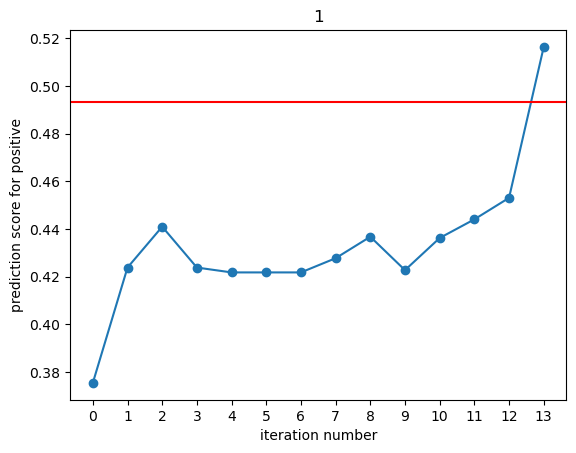

In [75]:
# Plot graphs
counter = 1
items = scores.copy()
for item in items:
    is_negative = False
    if item[0] < rf_threshold:
        print("negative")
        is_negative = True
        for i in range(len(item)):
            item[i] = 1 - item[i]
        item[0] = 1 - item[0]
        item[-1] = 1 - item[-1]
    data = item
    x = range(len(data))
    plt.plot(x, data, marker="o", linestyle="-")
    # draw a horizontal line at y = 0.499
    plt.axhline(y=rf_threshold, color="r", linestyle="-")

    plt.xticks(range(len(data)))

    # Add labels to the axes
    plt.xlabel("iteration number")
    plt.ylabel("prediction score for positive")

    # Add a title to the graph
    plt.title(str(counter))
    plt.show()
    # Show the plot

    plt.show()

### SEDC Method


In [76]:
from src.analyzers import SEDCAnalyzer
%load_ext autoreload
%autoreload 2

indices = [6, 9, 10, 12, 18, 21, 24, 26, 38, 40, 41, 49, 52, 55, 59, 60]
indices = [37]
scores_sedc = []
sedc_threshold = 0.49339999999983775

for index in indices:
    explainer_sedc = SEDCAnalyzer(
        "./models/analysis-models/rf.pkl",
        "./models/analysis-models/tfidf.pkl",
        threshold_classifier=sedc_threshold,
        max_iter=50,
        time_maximum=120,
    )
    explainer_sedc(ds.x_test[index, :], None)
    scores_sedc.append(explainer_sedc.get_scores())

# If an element is an array, convert it to float
for element in scores_sedc:
    for index in range(len(element)):
        if (not isinstance(element[index], float)):
            element[index] = element[index][0]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Start initialization...
Initialization is complete.

 Elapsed time 0 


 Iteration 1 

Stop iterations...

 Elapsed time 1 

Iterations are done.

 Total elapsed time 1 



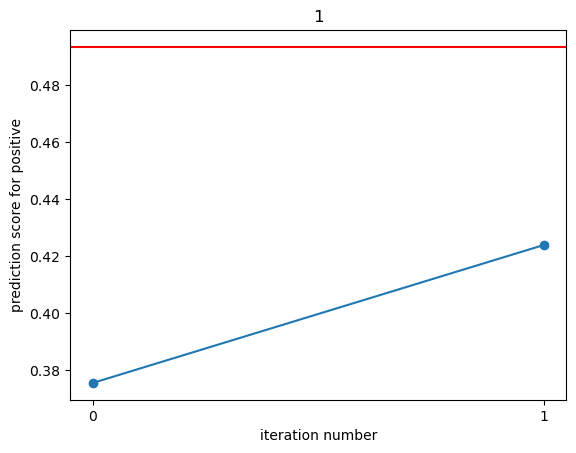

In [77]:
# Plot graphs
counter = 1
for item in scores_sedc:
    data = item
    x = range(len(data))
    plt.plot(x, data, marker="o", linestyle="-")
    # draw a horizontal line at y = 0.499
    if data[0] < sedc_threshold:
        plt.axhline(y=sedc_threshold, color="r", linestyle="-")
    else:
        plt.axhline(y=1 - sedc_threshold, color="r", linestyle="-")

    plt.xticks(range(len(data)))

    # Add labels to the axes
    plt.xlabel("iteration number")
    plt.ylabel("prediction score for positive")

    # Add a title to the graph
    plt.title(str(counter))
    plt.show()
    # Show the plot

    plt.show()

negative


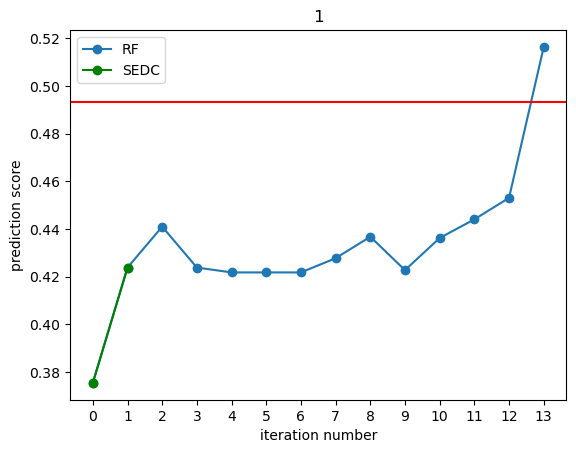

In [79]:
# Plot graphs
counter = 1
items = scores.copy()
sedc_items = scores_sedc.copy()
for item in range(len(items)):
    is_negative = False
    if items[item][0] < rf_threshold:
        print("negative")
        is_negative = True
        for i in range(len(items[item])):
            items[item][i] = 1 - items[item][i]
        items[item][0] = 1 - items[item][0]
        items[item][-1] = 1 - items[item][-1]
    data = items[item]
    sedc_data = sedc_items[item]
    x = range(len(data))
    sedc_x = range(len(sedc_data))
    plt.plot(x, data, marker="o", linestyle="-")
    plt.plot(sedc_x, sedc_data, marker="o", linestyle="-", color="g")
    # draw a horizontal line at y = 0.499
    plt.axhline(y=rf_threshold, color="r", linestyle="-")

    # add line description
    plt.legend(["RF", "SEDC"])

    ticksCount = max(len(data), len(sedc_data))

    # plt.xticks(range(len(data)))
    plt.xticks(range(ticksCount))

    # Add labels to the axes
    plt.xlabel("iteration number")
    plt.ylabel("prediction score")

    # Add a title to the graph
    plt.title(str(counter))
    plt.show()
    # Show the plot

# Test Bench


In [21]:
from src.test_bench import TestBench

configurations = [
    {
        "name": "Base config",
        "threshold_classifier": 0.49339999999983775,
        "max_iter": 50,
        "time_maximum": 120,
    }
]

tb = TestBench(
    model_path="./models/analysis-models/rf.pkl",
    vectorizer_path="./models/analysis-models/tfidf.pkl",
    analyzer_name="rf",
    threshold_classifier=0.49339999999983775,
    max_iter=50,
    time_maximum=120,
)

In [22]:
# text = "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
text = "eventhough action was okay, it was a bit dissappointing movie"
reports = tb(configurations, text, None)

Start initialization...
initial sentence is ... 
(1, 11612)
['..action..', '..bit..', '..movie..', '..okay..']
score_predicted   [0.62196478]   initial_class   [1]
candidates_to_expand  [OrderedSet([6911]), OrderedSet([1216]), OrderedSet([7317]), OrderedSet([308])]
explanation_candidates  [OrderedSet([6911]), OrderedSet([1216]), OrderedSet([7317]), OrderedSet([308])]
Initialization is complete.

 Elapsed time 0 


 Iteration 1 

Run in first iteration -> perturbation done 

explanation_candidates 
 [OrderedSet([6911]), OrderedSet([1216]), OrderedSet([7317]), OrderedSet([308])] 

['..action..', '..bit..', '--movie--', '..okay..', '  --> class 1 Score = ', 0.6482996618230485]
['..action..', '--bit--', '..movie..', '..okay..', '  --> class 1 Score = ', 0.6152394600070911]
['..action..', '..bit..', '..movie..', '--okay--', '  --> class 1 Score = ', 0.7542752150099061]
['--action--', '..bit..', '..movie..', '..okay..', '  --> class 1 Score = ', 0.6304919305036547]
scores_explanation_candida

In [23]:
for report in reports:
    print(report)
    print()

==== Configuration Base config (1) ====
{
    "input": {
        "text": "eventhough action was okay, it was a bit dissappointing movie",
        "score for positive": 0.6219647770125678,
        "initial class": 1
    },
    "feature_importances": [
        {
            "feature": 2,
            "word": "10",
            "importance": 0.0004773718473385374
        },
        {
            "feature": 3,
            "word": "100",
            "importance": 5.590446944848191e-05
        },
        {
            "feature": 4,
            "word": "1000",
            "importance": 6.137111492483919e-06
        },
        {
            "feature": 7,
            "word": "1010",
            "importance": 0.0005146660536944164
        },
        {
            "feature": 8,
            "word": "11",
            "importance": 1.926369822521627e-05
        },
        {
            "feature": 9,
            "word": "110",
            "importance": 0.00014726670811389227
        },
        {
      

In [ ]:
from src.datasets import IMDBDataset

ds = IMDBDataset(config_path="./configs/datasets/imdb.yaml", root="datasets/imdb")
tb.evaluate(ds.x_test, ds.y_test, save_dir="evaluations/rf")